## Cryptocurrency - Exploration


In [3]:
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gpflow

In [4]:
def load_dataset(filename):

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

def load_pd_dataset(filename):
    data = pd.read_csv(filename)
    return data

In [5]:
dataset = load_pd_dataset('crypto-markets.csv')

In [6]:
dataset[dataset['name'] == 'Bitcoin'].head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [7]:
dataset[dataset['name'] == 'Bitcoin'].tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1756,bitcoin,BTC,Bitcoin,2018-02-17,1,10207.5,11139.5,10149.4,11112.7,8660880000,172191000000,0.9729,990.1
1757,bitcoin,BTC,Bitcoin,2018-02-18,1,11123.4,11349.8,10326.0,10551.8,8744010000,187663000000,0.2206,1023.8
1758,bitcoin,BTC,Bitcoin,2018-02-19,1,10552.6,11273.8,10513.2,11225.3,7652090000,178055000000,0.9362,760.6
1759,bitcoin,BTC,Bitcoin,2018-02-20,1,11231.8,11958.5,11231.8,11403.7,9926540000,189536000000,0.2365,726.7
1760,bitcoin,BTC,Bitcoin,2018-02-21,1,11372.2,11418.5,10479.1,10690.4,9405340000,191927000000,0.2249,939.4


In [8]:
d = dataset.groupby('name').mean()
d[d['market']==0]
# print(d.index)
# # np.array(d.index)
# d[d['name']=='2GIVE']

,ranknow,open,high,low,close,volume,market,close_ratio,spread
name,,,,,,,,,
ACChain,1201.0,2.070833,2.279167,1.822962,2.164167,1.176979e+06,0.0,0.732925,0.455833
AI Doctor,1185.0,0.110304,0.120241,0.095518,0.106441,1.474729e+07,0.0,0.486465,0.024884
ANRYZE,1446.0,0.021745,0.025542,0.018007,0.021758,9.896036e+04,0.0,0.528064,0.007816
ATMCoin,1170.0,3.311844,3.444606,3.185565,3.342904,4.152138e+07,0.0,0.601474,0.259253
ATN,1229.0,1.331259,1.442439,1.183203,1.332435,4.613741e+05,0.0,0.557644,0.259268
AWARE,1239.0,0.041316,0.044898,0.035370,0.040091,9.746545e+05,0.0,0.486221,0.010000
Aces,1344.0,0.000282,0.000497,0.000176,0.000285,2.882607e+03,0.0,0.428068,0.000165
Acute Angle Cloud,1213.0,0.183453,0.199155,0.168853,0.181961,4.882866e+06,0.0,0.380327,0.030303
Akuya Coin,1450.0,0.380876,0.502226,0.258063,0.347544,5.188265e+04,0.0,0.414059,0.243566


In [9]:
dataset[dataset['ranknow'] == 1].tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1756,bitcoin,BTC,Bitcoin,2018-02-17,1,10207.5,11139.5,10149.4,11112.7,8660880000,172191000000,0.9729,990.1
1757,bitcoin,BTC,Bitcoin,2018-02-18,1,11123.4,11349.8,10326.0,10551.8,8744010000,187663000000,0.2206,1023.8
1758,bitcoin,BTC,Bitcoin,2018-02-19,1,10552.6,11273.8,10513.2,11225.3,7652090000,178055000000,0.9362,760.6
1759,bitcoin,BTC,Bitcoin,2018-02-20,1,11231.8,11958.5,11231.8,11403.7,9926540000,189536000000,0.2365,726.7
1760,bitcoin,BTC,Bitcoin,2018-02-21,1,11372.2,11418.5,10479.1,10690.4,9405340000,191927000000,0.2249,939.4


In [10]:
dataset[dataset['ranknow'] == 2].tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
2686,ethereum,ETH,Ethereum,2018-02-17,2,944.75,976.60,940.75,974.12,2525720000,92264000000,0.9308,35.85
2687,ethereum,ETH,Ethereum,2018-02-18,2,973.35,982.93,915.45,923.92,2567290000,95077100000,0.1255,67.48
2688,ethereum,ETH,Ethereum,2018-02-19,2,921.67,957.78,921.55,943.87,2169020000,90047700000,0.6161,36.23
2689,ethereum,ETH,Ethereum,2018-02-20,2,943.57,965.26,892.95,895.37,2545260000,92206500000,0.0335,72.31
2690,ethereum,ETH,Ethereum,2018-02-21,2,894.13,912.38,830.56,849.97,2531730000,87394200000,0.2372,81.82


In [11]:
dataset[dataset['ranknow'] == 100].tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
52238,ignis,IGNIS,Ignis,2018-02-17,100,0.245327,0.262122,0.243568,0.258393,6910930,186729000,0.7990,0.02
52239,ignis,IGNIS,Ignis,2018-02-18,100,0.258516,0.262333,0.230749,0.241146,5536300,196768000,0.3292,0.03
52240,ignis,IGNIS,Ignis,2018-02-19,100,0.241701,0.289138,0.239119,0.279037,17449500,183970000,0.7981,0.05
52241,ignis,IGNIS,Ignis,2018-02-20,100,0.274916,0.292821,0.235766,0.237727,16824700,209251000,0.0344,0.06
52242,ignis,IGNIS,Ignis,2018-02-21,100,0.236103,0.243171,0.213143,0.222555,6706470,179709000,0.3134,0.03


In [12]:
#rank by market cap
d_rank = dataset[(dataset['date'] == '2018-02-21') & (dataset['market']!=0)]
d_rank = d_rank[['name','market']]
d_rank.sort_values(by='market', ascending=False)

,name,market
1760,Bitcoin,191927000000
2690,Ethereum,87394200000
4353,Ripple,42207600000
4567,Bitcoin Cash,23988100000
6328,Litecoin,12773200000
6472,Cardano,9738030000
7003,NEO,8298400000
8300,Stellar,7381920000
8536,EOS,6315770000
10005,Dash,5435710000


In [13]:
#see if market cap is 0 for any data of any type under first 11 ranks
data = dataset[dataset['ranknow'] < 11]
d = data.groupby('name').min()
d

,slug,symbol,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
name,,,,,,,,,,,,
Bitcoin,bitcoin,BTC,2013-04-28,1,68.500000,74.560000,65.530000,68.430000,0,779255000,0.0,0.00
Bitcoin Cash,bitcoin-cash,BCH,2017-07-23,4,212.180000,223.700000,200.980000,213.150000,85013,0,0.0,7.50
Cardano,cardano,ADA,2017-10-01,6,0.018414,0.021050,0.017354,0.018539,1739460,0,0.0,0.00
Dash,dash,DASH,2014-02-14,10,0.213899,0.354461,0.213899,0.314865,9604,702537,0.0,0.03
EOS,eos,EOS,2017-07-01,9,0.492790,0.518657,0.480196,0.493225,4556540,0,0.0,0.02
Ethereum,ethereum,ETH,2015-08-07,2,0.431589,0.482988,0.420897,0.434829,102128,0,0.0,0.02
Litecoin,litecoin,LTC,2013-04-28,5,1.150000,1.340000,1.110000,1.160000,0,37943700,0.0,0.01
NEO,neo,NEO,2016-09-09,7,0.080197,0.085211,0.072287,0.080181,156,0,0.0,0.00
Ripple,ripple,XRP,2013-08-04,3,0.002809,0.003082,0.002802,0.002810,0,21960300,0.0,0.00


In [22]:
plt.style.use('fivethirtyeight')

In [48]:
d_rank = dataset[dataset['market']!=0]
ranks = np.unique(np.array(d_rank['ranknow']))

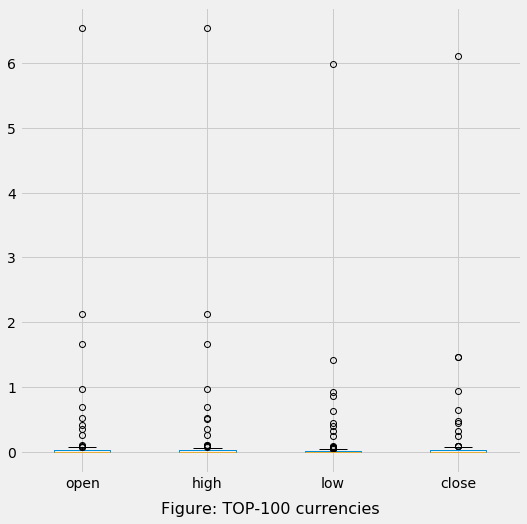

In [51]:
d = dataset[(dataset['date'] == '2018-02-21') & (dataset['ranknow'] >1416)]
d = d[['open','high', 'low', 'close']]

fig = plt.figure(figsize=(8, 8))
box = d.boxplot(grid=True, return_type='axes', showfliers=True)
plt.title('Figure: TOP-100 currencies', y=-0.1, fontsize=16)
plt.show()

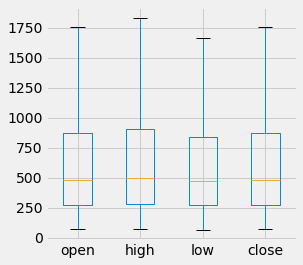

In [24]:
d = dataset[dataset['ranknow'] == 1]
d = d[['open','high', 'low', 'close']]

fig = plt.figure(figsize=(4, 4))
box = d.boxplot(grid=True, return_type='axes', showfliers=False)
plt.show()

In [25]:
# test for normalization
scaler = MinMaxScaler()
dat = dataset[['open','high', 'low', 'close']]
scaler.fit(dat)
dat = scaler.transform(dat)
dat

array([[  5.88672941e-05,   4.64714125e-05,   6.50549840e-05,
          5.83334058e-05],
       [  5.84931191e-05,   5.04049759e-05,   6.59906727e-05,
          6.28232656e-05],
       [  6.26525524e-05,   5.02135949e-05,   6.60152960e-05,
          6.04153446e-05],
       ..., 
       [  6.52521983e-12,   1.05932128e-11,   7.38701555e-12,
          1.30392830e-11],
       [  1.30515274e-11,   1.09349646e-11,   7.87948326e-12,
          7.38892704e-12],
       [  7.39539417e-12,   5.80868733e-12,   7.87948326e-12,
          7.38892704e-12]])

In [37]:
d_rank = dataset[dataset['market']!=0]
ranks = np.unique(np.array(d_rank['ranknow']))
len(ranks)

1216

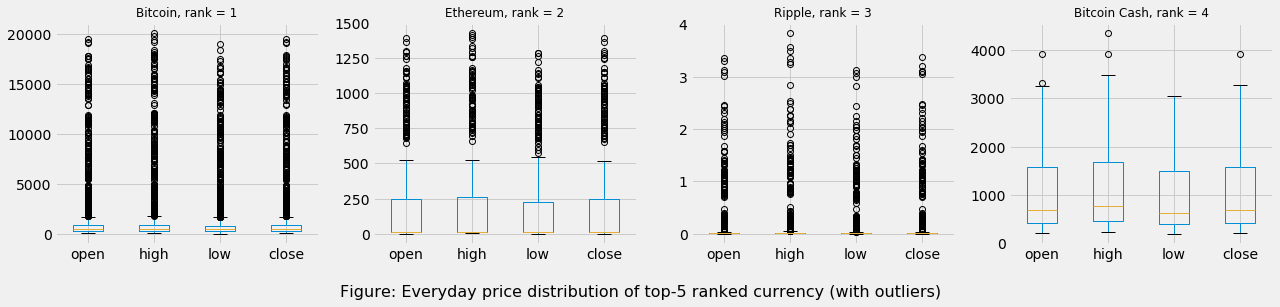

In [38]:
fig = plt.figure(figsize=(18, 4))
sub = []
first_rank = 1
last_rank = 4
ncols = 4
nrows = int(np.ceil((last_rank-first_rank)/ncols))
ind = 1
for rank in range(first_rank, last_rank+1):
    sub.append(plt.subplot(nrows, ncols, ind))
    d = dataset[dataset['ranknow'] == rank]
    name = d.iloc[0, 2]
    sub[ind-1].set_title(label=name+', rank = '+ str(rank), fontsize=12)
    d = d[['open','high', 'low', 'close']]
    box = d.boxplot(grid=True, return_type='axes', showfliers=True)
    ind += 1
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Figure: Everyday price distribution of top-5 ranked currency (with outliers)', y=-0.03, fontsize=16)
plt.show()

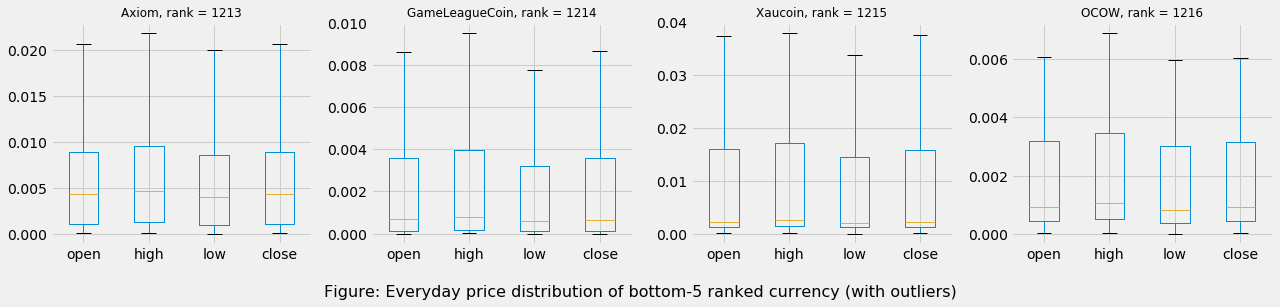

In [47]:
fig = plt.figure(figsize=(18, 4))
sub = []
ncols = 4
nrows = 1
count = ncols*nrows
ind = 1
last_or_first = False
if not last_or_first:
    rk_start = len(ranks)-count
    rk_end = len(ranks)
else:
    rk_start = 0
    rk_end = count+1
for rank in range(rk_start, rk_end):
    sub.append(plt.subplot(nrows, ncols, ind))
    d = dataset[dataset['ranknow'] == ranks[rank]]
    name = d.iloc[0, 2]
    sub[ind-1].set_title(label=name+', rank = '+ str(rank+1), fontsize=12)
    d = d[['open','high', 'low', 'close']]
    box = d.boxplot(grid=True, return_type='axes', showfliers=False)
    if ind == count:
        break
    ind += 1
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Figure: Everyday price distribution of bottom-5 ranked currency (with outliers)', y=-0.03, fontsize=16)
plt.show()

In [28]:
dataset.max()

slug                zurcoin
symbol                  ZZC
name               vTorrent
date             2018-02-21
ranknow                1516
open            2.29839e+06
high             2.9261e+06
low             2.03059e+06
close           2.30074e+06
volume          23840900000
market         326141000000
close_ratio               1
spread          1.77056e+06
dtype: object

In [29]:
dataset.min()

slug                   0x
symbol                $$$
name                   0x
date           2013-04-28
ranknow                 1
open              2.5e-09
high              3.2e-09
low               9.2e-14
close                   0
volume                  0
market                  0
close_ratio          -inf
spread                  0
dtype: object

In [ ]:
## Cryptocurrency - Exploration


import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gpflow

def load_dataset(filename):

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

def load_pd_dataset(filename):
    data = pd.read_csv(filename)
    return data

dataset = load_pd_dataset('crypto-markets.csv')

dataset[dataset['name'] == 'Bitcoin'].head()

dataset[dataset['name'] == 'Bitcoin'].tail()

d = dataset.groupby('name').mean()
d[d['market']==0]
# print(d.index)
# # np.array(d.index)
# d[d['name']=='2GIVE']

dataset[dataset['ranknow'] == 1].tail()

dataset[dataset['ranknow'] == 2].tail()

dataset[dataset['ranknow'] == 100].tail()

#rank by market cap
d_rank = dataset[(dataset['date'] == '2018-02-21') & (dataset['market']!=0)]
d_rank = d_rank[['name','market']]
d_rank.sort_values(by='market', ascending=False)

#see if market cap is 0 for any data of any type under first 11 ranks
data = dataset[dataset['ranknow'] < 11]
d = data.groupby('name').min()
d

plt.style.use('fivethirtyeight')

d_rank = dataset[dataset['market']!=0]
ranks = np.unique(np.array(d_rank['ranknow']))

d = dataset[(dataset['date'] == '2018-02-21') & (dataset['ranknow'] >1416)]
d = d[['open','high', 'low', 'close']]

fig = plt.figure(figsize=(8, 8))
box = d.boxplot(grid=True, return_type='axes', showfliers=True)
plt.title('Figure: TOP-100 currencies', y=-0.1, fontsize=16)
plt.show()

d = dataset[dataset['ranknow'] == 1]
d = d[['open','high', 'low', 'close']]

fig = plt.figure(figsize=(4, 4))
box = d.boxplot(grid=True, return_type='axes', showfliers=False)
plt.show()

# test for normalization
scaler = MinMaxScaler()
dat = dataset[['open','high', 'low', 'close']]
scaler.fit(dat)
dat = scaler.transform(dat)
dat

d_rank = dataset[dataset['market']!=0]
ranks = np.unique(np.array(d_rank['ranknow']))
len(ranks)

fig = plt.figure(figsize=(18, 4))
sub = []
first_rank = 1
last_rank = 4
ncols = 4
nrows = int(np.ceil((last_rank-first_rank)/ncols))
ind = 1
for rank in range(first_rank, last_rank+1):
    sub.append(plt.subplot(nrows, ncols, ind))
    d = dataset[dataset['ranknow'] == rank]
    name = d.iloc[0, 2]
    sub[ind-1].set_title(label=name+', rank = '+ str(rank), fontsize=12)
    d = d[['open','high', 'low', 'close']]
    box = d.boxplot(grid=True, return_type='axes', showfliers=True)
    ind += 1
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Figure: Everyday price distribution of top-5 ranked currency (with outliers)', y=-0.03, fontsize=16)
plt.show()

fig = plt.figure(figsize=(18, 4))
sub = []
ncols = 4
nrows = 1
count = ncols*nrows
ind = 1
last_or_first = False
if not last_or_first:
    rk_start = len(ranks)-count
    rk_end = len(ranks)
else:
    rk_start = 0
    rk_end = count+1
for rank in range(rk_start, rk_end):
    sub.append(plt.subplot(nrows, ncols, ind))
    d = dataset[dataset['ranknow'] == ranks[rank]]
    name = d.iloc[0, 2]
    sub[ind-1].set_title(label=name+', rank = '+ str(rank+1), fontsize=12)
    d = d[['open','high', 'low', 'close']]
    box = d.boxplot(grid=True, return_type='axes', showfliers=False)
    if ind == count:
        break
    ind += 1
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Figure: Everyday price distribution of bottom-5 ranked currency (with outliers)', y=-0.03, fontsize=16)
plt.show()

# fig = plt.figure(figsize=(18, 4))
# sub = []
# ncols = 5
# nrows = 1
# ind = 1

# for rank in range(1507, 1517):
#     sub.append(plt.subplot(nrows, ncols, ind))
#     d = dataset[dataset['ranknow'] == rank]
#     name = d.iloc[0, 2]
#     sub[ind-1].set_title(label=name+', rank = '+ str(rank), fontsize=12)
#     d = d[['open','high', 'low', 'close']]
#     box = d.boxplot(grid=True, return_type='axes', showfliers=False)
#     ind += 1

# fig.tight_layout()
# fig.subplots_adjust(top=0.88)
# plt.suptitle('Figure 2: Everyday price distribution of last ten ranked currency', y=-0.03, fontsize=16)
# plt.show()

dataset.max()

dataset.min()

## Cryptocurrency - Fluctuations


In [34]:
import warnings
# warnings.filterwarnings('ignore')
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gpflow
from queue import PriorityQueue

In [2]:
def load_dataset(filename):

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

def load_pd_dataset(filename):
    data = pd.read_csv(filename)
    return data

In [3]:
dataset = load_pd_dataset('crypto-markets.csv')

## Fluctuations

In [123]:
def plot_coin_info_mod(size_x, size_y, X, Y, coin_name, attribute, xlimit=-1, extra_title=""):
    plt.figure(figsize=(size_x, size_y))
    plt.plot(X, Y, 'ko-', mew=0.5)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel(coin_name+" "+attribute, fontsize=12)
    plt.title(coin_name+" "+attribute+" "+extra_title, fontsize=12)
    if xlimit == -1:
        plt.xlim([min(X), max(X)])
    else:
        plt.xlim(x_limit)
    plt.ylim([min(Y)-1, max(Y)+1])
    plt.style.use('fivethirtyeight')
#     plt.xticks(rotation=90)
    plt.show()

In [124]:
def decrement_increment(info_cumsum, pos='-'):
    pos_cumsum = []
    if pos == '+':
        value = -np.inf
        for i in range(len(info_cumsum)):
            if info_cumsum[i] > value:
                pos_cumsum.append(info_cumsum[i])
                value = info_cumsum[i]
            else:
                pos_cumsum.append(pos_cumsum[i-1])
        return pos_cumsum
    else:
        value = np.inf
        for i in range(len(info_cumsum)):
            if info_cumsum[i] < value:
                pos_cumsum.append(info_cumsum[i])
                value = info_cumsum[i]
            else:
                pos_cumsum.append(pos_cumsum[i-1])
        return pos_cumsum

In [125]:
start_date = '2017-03-01'
end_date = '2018-02-21'
attribute = 'market'
info = dataset[(dataset['date'] > start_date)][attribute]
date = pd.to_datetime(dataset[(dataset['date'] > start_date)]['date'])
# x_limit = [pd.to_datetime('2017-01-01'), max(date)]
# x_limit = [pd.to_datetime('2018-01-01'), pd.to_datetime('2018-02-01')]
x_limit = -1
# plot_coin_info(date, info, coin, attribute, x_limit)

In [126]:
# coin = 'Dash'
# dataset[dataset['name'] == coin].tail(1)

In [127]:
coin = 'Bitcoin'
attribute = 'market'
start_dt = np.array(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date)].head(1)['date'])[0]
end_dt = np.array(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date)].tail(1)['date'])[0]
info1 = dataset[(dataset['name'] == coin) & (dataset['date'] > start_dt)][attribute]
info2 = dataset[(dataset['name'] == coin) & (dataset['date'] >= start_dt) & (dataset['date'] < end_dt)][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > start_dt)]['date'])

In [128]:
# dataset[(dataset['name'] == coin) & (dataset['date'] > start_date)].head(1)['date']
# len(date)

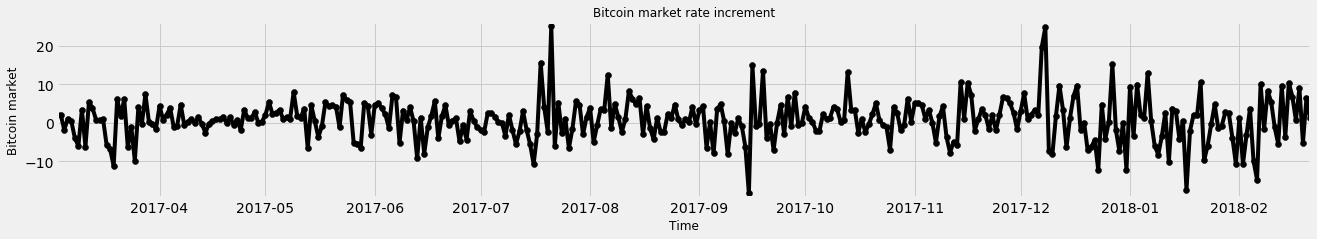

In [130]:
# in1 = np.array(info1)
# in2 = np.array(info2)
info = ((np.array(info1) - np.array(info2))/np.array(info2))*100
# info = in1/max(in1) - in2/max(in2)
# info = info - np.mean(info)
x_limit = -1
# print(info)
plot_coin_info_mod(20, 3, date, info, coin, attribute, x_limit, "rate increment")

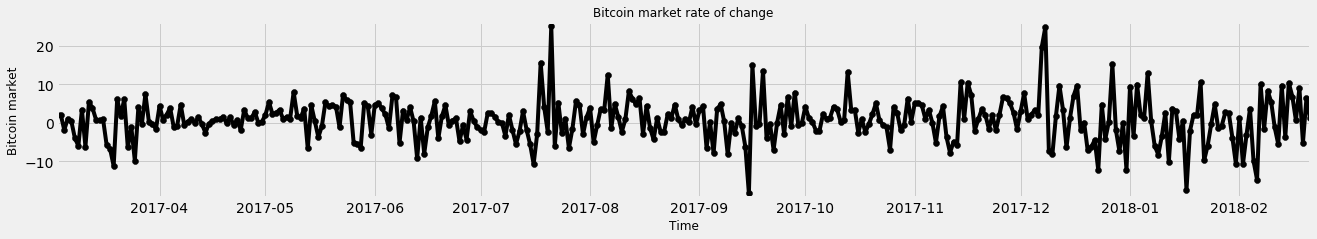

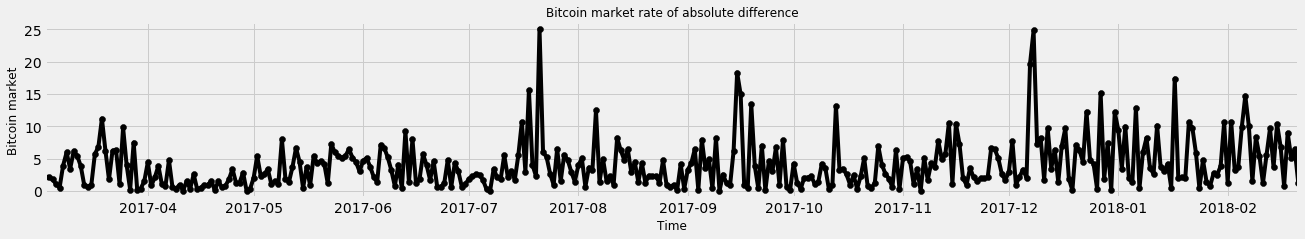

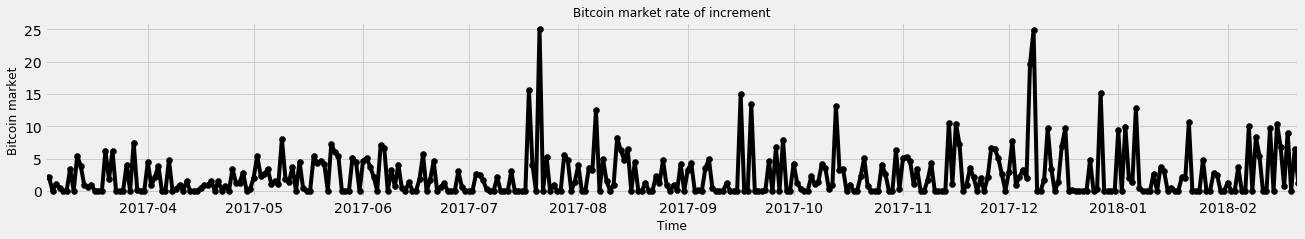

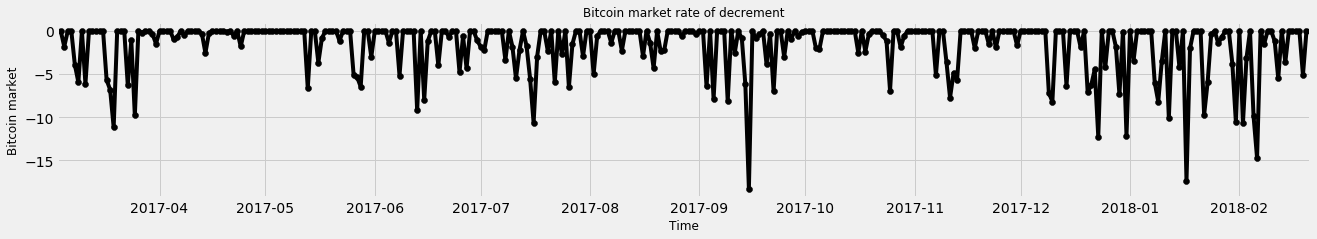

mean:  0.785317070498
absolute mean:  3.97778903415
positive mean:  2.38155305232
negative mean:  -1.59623598183


In [132]:
# min rate 
plot_coin_info_mod(20, 3, date, info, coin, attribute, x_limit, "rate of change")
info_mean = np.mean(info)

info_abs = np.abs(info)
plot_coin_info_mod(20, 3, date, info_abs, coin, attribute, x_limit, "rate of absolute difference")
info_abs_mean = np.mean(info_abs)

info_pos = np.where(info < 0, 0, info)
plot_coin_info_mod(20, 3, date, info_pos, coin, attribute, x_limit, "rate of increment")
info_pos_mean = np.mean(info_pos)

info_neg = np.where(info > 0, 0, info)
plot_coin_info_mod(20, 3, date, info_neg, coin, attribute, x_limit, "rate of decrement")
info_neg_mean = np.mean(info_neg)
print('mean: ', info_mean)
print('absolute mean: ', info_abs_mean)
print('positive mean: ', info_pos_mean)
print('negative mean: ', info_neg_mean)


In [111]:
pos_cumsum = decrement_increment(info, '-')

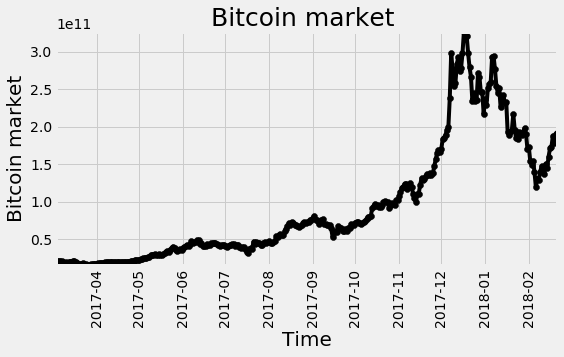

In [13]:
x_limit = -1
# info_raw = np.array(info1)
# info_raw = info_raw/max(info_raw)
plot_coin_info_mod(8,4, date, info1, coin, attribute, x_limit)

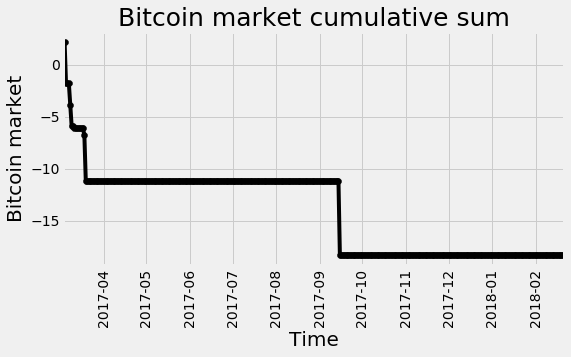

In [14]:
x_limit = -1
plot_coin_info_mod(8, 4, date, pos_cumsum, coin, attribute, x_limit, "cumulative sum")

## Fluctuations for each type of coins

In [52]:
def calculate_flactuation(dataset, coin_names, attribute, start_date, end_date, type_fl):
    PQ = PriorityQueue()
    skip = 0
    value_error = 0
    for coin in coin_names:
#         start_dt = np.array(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset[attribute] > 0)].head(1)['date'])[0]
#         end_dt = np.array(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date)].tail(1)['date'])[0]
        st_dt = np.array(dataset[(dataset['name'] == coin) & (dataset[attribute] > 0)].head(1)['date'])
        ed_dt = np.array(dataset[(dataset['name'] == coin) & (dataset[attribute] > 0)].tail(1)['date'])
        start_dt = st_dt[0] if len(st_dt)>0 else -1 
        end_dt = ed_dt[0] if len(ed_dt)>0 else -1
        if start_dt==-1 or end_dt==-1:
            skip+=1
            continue
        
        info1 = dataset[(dataset['name'] == coin) & (dataset['date'] > start_dt)& (dataset['date'] <= end_dt)][attribute]
        info2 = dataset[(dataset['name'] == coin) & (dataset['date'] >= start_dt) & (dataset['date'] < end_dt)][attribute]
        try:
            info = ((np.array(info1) - np.array(info2))/np.array(info2))*100
        except ValueError:
            print(coin)
            print(len(info1))
            print(len(info2))
            value_error += 1
            continue
         
        if type_fl=='default':
            info_mean = np.mean(info)
            if not (np.isinf(info_mean) or np.isnan(info_mean)):
                PQ.put((info_mean, coin))
        
        elif type_fl=='abs':
            try:
                info_fl = np.abs(info)
                info_mean = np.mean(info_fl)
                if not (np.isinf(info_mean) or np.isnan(info_mean)):
                    PQ.put((info_mean, coin))
            except:
                pass
            
        elif type_fl=='inc':
            try:
                info_fl = np.where(info < 0, 0, info)
                info_mean = np.mean(info_fl)
                if not (np.isinf(info_mean) or np.isnan(info_mean)):
                    PQ.put((info_mean, coin))
            except:
                pass
        
        elif type_fl=='dec':
            try:
                info_fl = np.where(info > 0, 0, info)
                info_mean = np.mean(info_fl)
                if not (np.isinf(info_mean) or np.isnan(info_mean)):
                    PQ.put((abs(info_mean), coin))
            except:
                pass
        else:
            print('Wrong Type Parameter!')
    return PQ, skip, value_error
        

In [113]:
data = dataset[(dataset['ranknow'] < 11) & (dataset['date']>start_date)]
d = data.groupby('name').max()

In [114]:
# coin_names = dataset.groupby('name').mean().index.tolist()
coin_names = d.index.tolist()

In [115]:
attribute = 'market'
pq_default, _, _ = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'default')
pq_abs, _, _ = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'abs')
pq_inc, _, _ = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'inc')
pq_dec, _, _ = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'dec')

In [116]:
# print(coin_names[0:10])
val_default = []
val_abs = []
val_inc = []
val_dec = []

while not pq_default.empty():
#     print(pq_default.get(),'\t',pq_abs.get(),'\t', pq_inc.get(),'\t',pq_dec.get())
    val_default.append(pq_default.get())
    val_abs.append(pq_abs.get())
    val_inc.append(pq_inc.get())
    val_dec.append(pq_dec.get())

In [117]:
fl_values = []
for i in range(0, len(val_default)):
    row = []
    row.append(val_default[i][0])
    row.append(val_default[i][1])
    row.append(val_abs[i][0])
    row.append(val_abs[i][1])
    row.append(val_inc[i][0])
    row.append(val_inc[i][1])
    row.append(val_dec[i][0])
    row.append(val_dec[i][1])
    fl_values.append(row)

# fl_values

In [118]:
types_fl = ['Mean Rate', 'Mean Absolute Rate', 'Mean Positive Rate', 'Mean Negative Rate']
cols = pd.MultiIndex.from_product([types_fl, ['value', 'coins']])

In [119]:
# pd.DataFrame.from_items([('mean', val_default),
#                         ('absolute', val_abs),
#                         ('positive', val_inc),
#                         ('negative', val_dec)])

In [120]:
fl_df = pd.DataFrame(fl_values, columns=cols)
fl_df.style.set_properties(**{'text-align': 'left'})

### coins that have positive mean and negative mean -> pie chart
### most fuctuations 

In [80]:
start_date = '2017-03-01'
data = dataset[dataset['date']>start_date]
d = data.groupby('name').max()
coin_names = d.index.tolist()

In [84]:
attribute = 'market'
pq_all_mean, skip, error = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'default')

/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [85]:
val_all_mean = []

while not pq_all_mean.empty():
    val_all_mean.append(pq_all_mean.get())

len(val_all_mean)

1127

In [133]:
_0x = 0.5
neg_mean_count = 0
mean_0x = 0
for tp in val_all_mean:
    if tp[0] < 0:
#         print(tp)
        neg_mean_count+=1
    elif tp[0] < _0x:
        mean_0x +=1

print('- mean: ', neg_mean_count)
print('.x mean: ', mean_0x)
print('+ mean: ', len(val_all_mean) - neg_mean_count -mean_0x)

- mean:  82
.x mean:  23
+ mean:  1022


## Cryptocurrency Predicion
## GP Flow

In [24]:
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gpflow

In [25]:
def load_dataset(filename):

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

def load_pd_dataset(filename):
    data = pd.read_csv(filename)
    return data

In [26]:
dataset = load_pd_dataset('crypto-markets.csv')

### Time-Series prediction

In [61]:
def plot(X_train, Y_train, X_test, Y_test, X_pred, Y_pred_mean, Y_pred_var, xlimit, title):
    plt.figure(figsize=(12, 6))
    plt.plot(X_train, Y_train, 'kx', mew=2, label="Train")
    plt.plot(X_test, Y_test, 'rx', mew=2, label="Test")
    plt.plot(X_pred, Y_pred_mean, 'C0', lw=2)
    plt.fill_between(X_pred[:,0],
                     Y_pred_mean[:,0] - 2*np.sqrt(Y_pred_var[:,0]),
                     Y_pred_mean[:,0] + 2*np.sqrt(Y_pred_var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(xlimit)
    plt.ylim([min(Y_train), max(Y_train)])
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.legend()
    plt.title(title, fontsize=25)
    plt.style.use('fivethirtyeight')
    plt.show()

In [62]:
def plot_coin_info(X, Y, coin_name, attribute, xlimit=-1):
    plt.figure(figsize=(18, 8))
    plt.plot(X, Y, 'ko-', mew=0.5)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel(coin_name+" "+attribute, fontsize=20)
    plt.title(coin_name+" "+attribute, fontsize=25)
    if xlimit == -1:
        plt.xlim([min(X), max(X)])
    else:
        plt.xlim(x_limit)
    plt.ylim([min(Y)-1, max(Y)+1])
    plt.style.use('fivethirtyeight')
    plt.show()

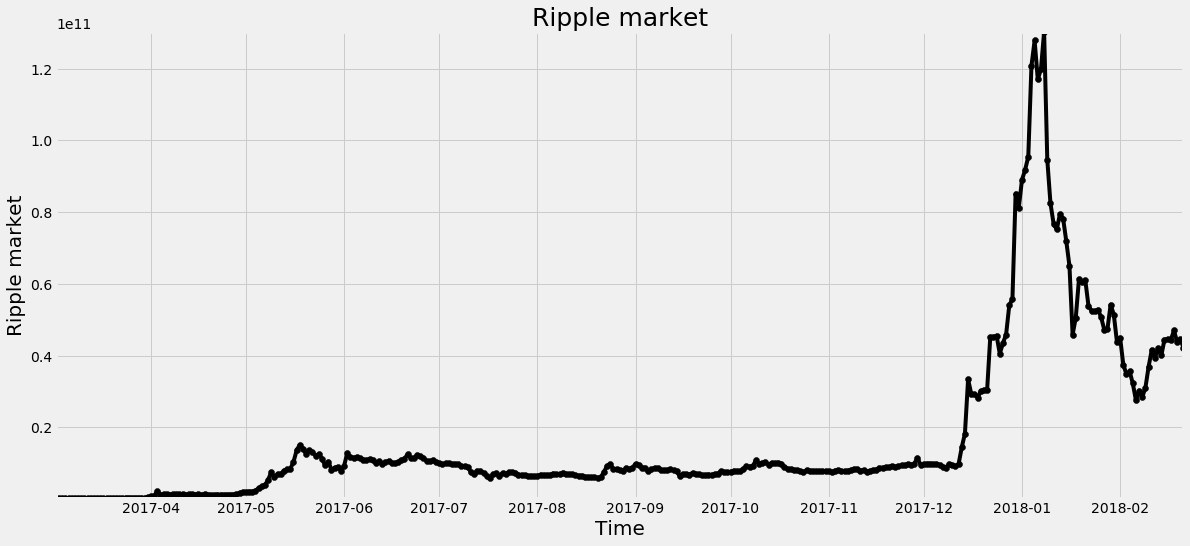

In [29]:
coin = 'Ripple'
attribute = 'market'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')]['date'])
# x_limit = [pd.to_datetime('2017-01-01'), max(date)]
# x_limit = [pd.to_datetime('2018-01-01'), pd.to_datetime('2018-02-01')]
x_limit = -1
plot_coin_info(date, info, coin, attribute, x_limit)

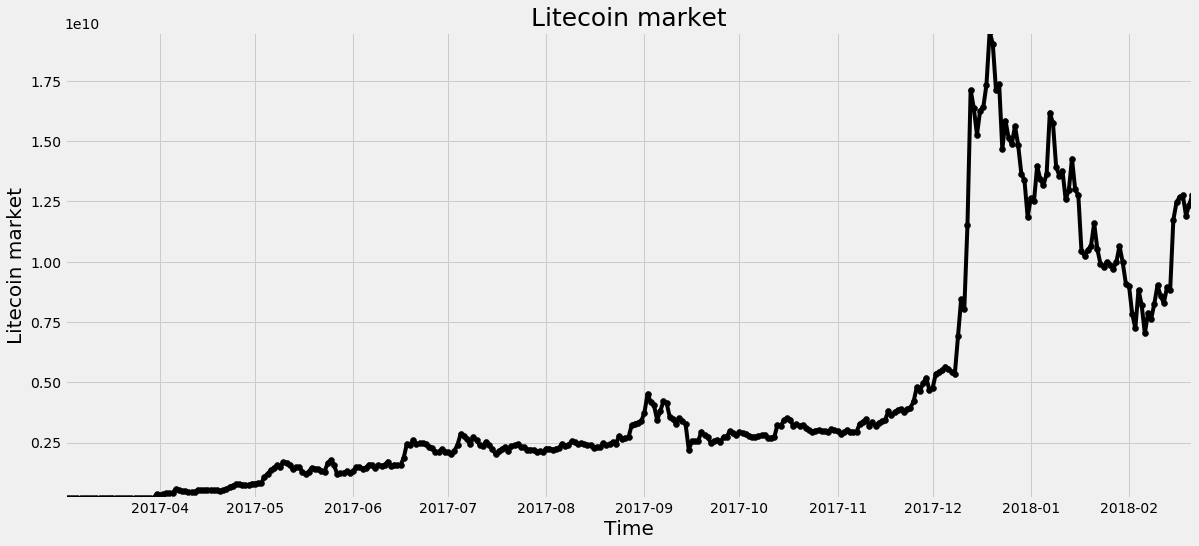

In [30]:
coin = 'Litecoin'
attribute = 'market'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')]['date'])
# x_limit = [pd.to_datetime('2017-01-01'), max(date)]
# x_limit = [pd.to_datetime('2018-01-01'), pd.to_datetime('2018-02-01')]
x_limit = -1
plot_coin_info(date, info, coin, attribute, x_limit)

In [38]:
coin = 'Bitcoin'
attribute = 'close'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')]['date'])
# x_limit = [pd.to_datetime('2017-01-01'), max(date)]
# x_limit = [pd.to_datetime('2018-01-01'), pd.to_datetime('2018-02-01')]
# x_limit = -1
# plot_coin_info(date, info, coin, attribute, x_limit)

date_number = date.index.values.astype(float)
date_mean0 = date_number - date_number.mean(0)
date_gp = np.array(date_mean0, dtype=np.float64).reshape(len(date_mean0), 1)
info_gp = np.array(info, dtype=np.float64).reshape(len(info), 1)
info_gp_log = np.log(info_gp)

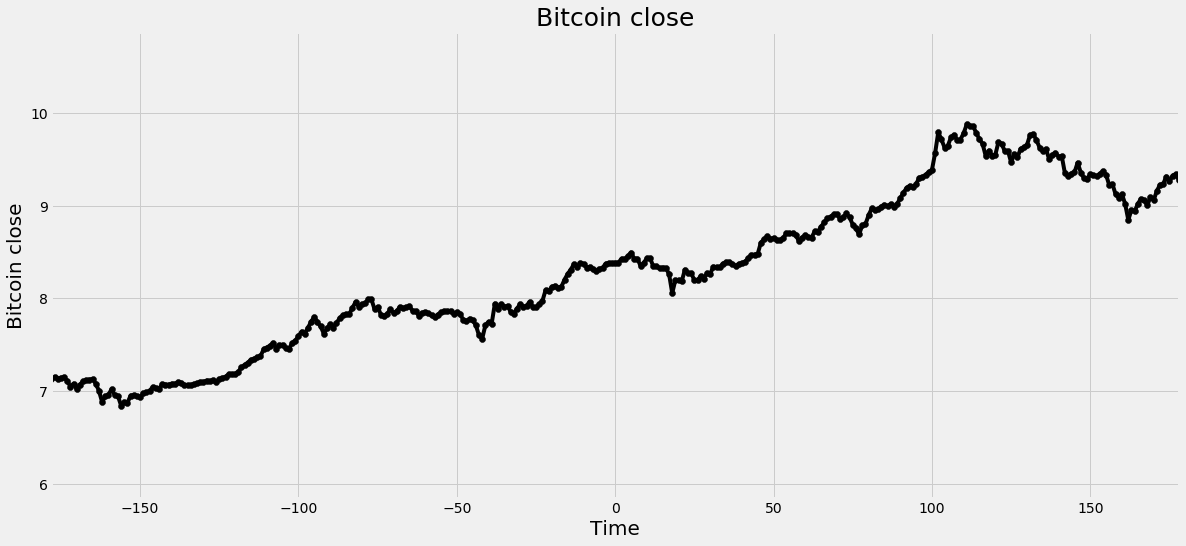

In [39]:
plot_coin_info(date_gp, info_gp_log, coin, attribute)

In [95]:
coin = 'Bitcoin'
attribute = 'close'
start_date = '2017-04-01'
end_date = '2018-03-22'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)]['date'])

date_number = date.index.values.astype(float)
date_mean0 = date_number - date_number.mean(0)
date_gp = np.array(date_mean0, dtype=np.float64).reshape(len(date_mean0), 1)
info_gp = np.array(info, dtype=np.float64).reshape(len(info), 1)

info_count = len(info_gp)
train_count = int(info_count * 0.95)
info_gp_train = info_gp[:train_count]
date_gp_train = date_gp[:train_count]

In [96]:
# constant + linear kernel
k_const = gpflow.kernels.Constant(1)
k_linear = gpflow.kernels.Linear(1)
# k = k_const + k_linear
k_periodic = gpflow.kernels.Periodic(1, period=1.2)
k_matern12 = gpflow.kernels.Matern52(1)
k_rbf = gpflow.kernels.RBF(1)
# k = k_rbf * k_linear
# k = k_rbf
k = k_const + k_rbf * k_linear

# condition on data and optimize kernel hyperparameters
m = gpflow.models.GPR(date_gp_train, info_gp_train, kern=k)
m.likelihood.variance = 1
gpflow.train.ScipyOptimizer().minimize(m)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2639.154920
  Number of iterations: 63
  Number of functions evaluations: 80


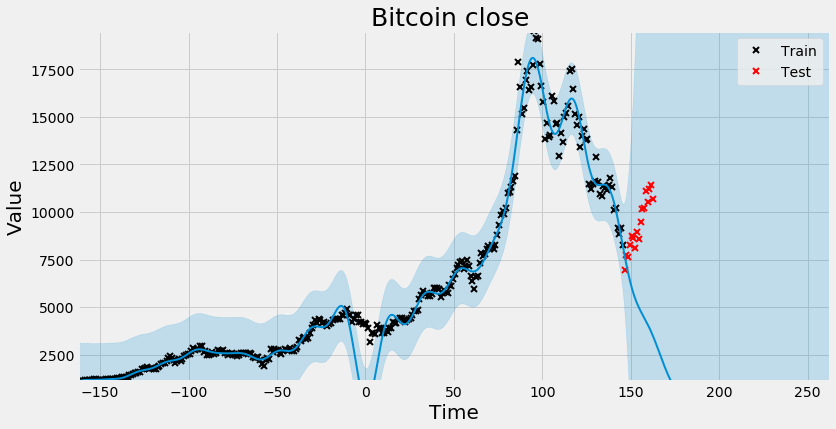

In [97]:
X_pred = np.linspace(date_gp.min(), date_gp.max()+100, 1000)[:, None]
Y_pred_mean, Y_pred_var = m.predict_y(X_pred)
Y_test = info_gp[train_count:]
X_test = date_gp[train_count:]

xlimit = [min(date_gp), max(date_gp)+100]
plot(date_gp_train, info_gp_train, X_test, Y_test, X_pred, Y_pred_mean, Y_pred_var, xlimit, coin+" "+attribute+" ")

## Log normalize

In [66]:
coin = 'Bitcoin'
attribute = 'close'
start_date = '2017-04-01'
end_date = '2018-03-22'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)]['date'])

date_number = date.index.values.astype(float)
date_mean0 = date_number - date_number.mean(0)
date_gp = np.array(date_mean0, dtype=np.float64).reshape(len(date_mean0), 1)
info_gp = np.array(info, dtype=np.float64).reshape(len(info), 1)

info_gp_log = np.log(info_gp)

info_count = len(info_gp_log)
train_count = int(info_count * 0.90)
info_gp_log_train = info_gp_log[:train_count]
date_gp_train = date_gp[:train_count]

In [81]:
# constant + linear kernel
k_const = gpflow.kernels.Constant(1)
k_linear = gpflow.kernels.Linear(1)
# k = k_const + k_linear
k_periodic = gpflow.kernels.Periodic(1, period=1.2)
k_matern12 = gpflow.kernels.Matern52(1)
k_rbf = gpflow.kernels.RBF(1)
# k = k_rbf * k_linear
# k = k_rbf
k = k_const + k_rbf * k_linear + k_periodic

# condition on data and optimize kernel hyperparameters
m = gpflow.models.GPR(date_gp_train, info_gp_log_train, kern=k)
m.likelihood.variance = 1
gpflow.train.ScipyOptimizer().minimize(m)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -363.460334
  Number of iterations: 106
  Number of functions evaluations: 156


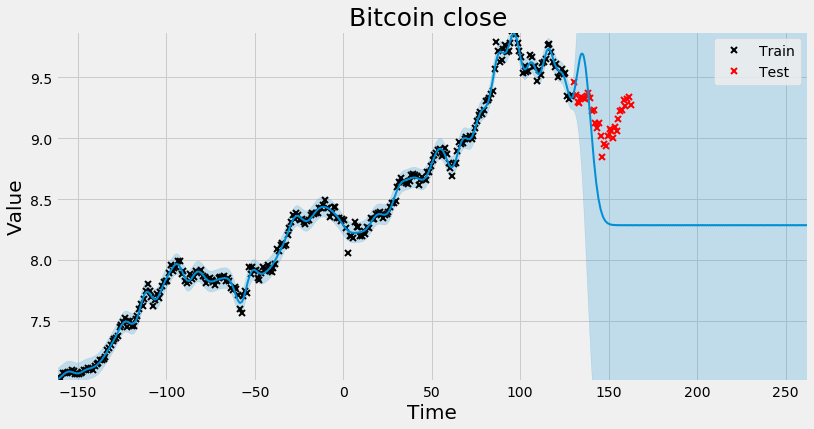

In [82]:
X_pred = np.linspace(date_gp.min(), date_gp.max()+100, 1000)[:, None]
Y_pred_mean, Y_pred_var = m.predict_y(X_pred)
Y_test = info_gp_log[train_count:]
X_test = date_gp[train_count:]

xlimit = [min(date_gp), max(date_gp)+100]
plot(date_gp_train, info_gp_log_train, X_test, Y_test, X_pred, Y_pred_mean, Y_pred_var, xlimit, coin+" "+attribute+" ")

In [83]:
# # perform prediction
# X_pred = np.linspace(date_gp.min(), date_gp.max()+100, 1000)[:, None]
# Y_pred_mean, Y_pred_var = m.predict_y(X_pred)

In [67]:
# X_test = []
# Y_test = []
# xlimit = [min(date_gp), max(date_gp)+100]
# plot(date_gp, info_gp_log, X_test, Y_test, X_pred, Y_pred_mean, Y_pred_var, xlimit, "")

### tanh estimator

In [48]:
coin = 'Bitcoin'
attribute = 'close'
start_date = '2017-04-01'
end_date = '2018-03-22'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)]['date'])

date_number = date.index.values.astype(float)
date_mean0 = date_number - date_number.mean(0)
date_gp = np.array(date_mean0, dtype=np.float64).reshape(len(date_mean0), 1)
info_gp = np.array(info, dtype=np.float64).reshape(len(info), 1)

info_gp_log = np.log(info_gp)

info_gp_mean = np.mean(info_gp_log)
info_gp_std = np.std(info_gp_log)
info_normalized = 0.5 * (np.tanh((0.01*(info_gp_log - info_gp_mean))/info_gp_std) + 1)

info_count = len(info_normalized)
train_count = int(info_count * 0.90)
info_normalized_train = info_normalized[:train_count]
date_gp_train = date_gp[:train_count]

In [49]:
# plot_coin_info(date_gp, info_normalized, coin, attribute)

In [64]:
k_const = gpflow.kernels.Constant(1)
k_linear = gpflow.kernels.Linear(1)
# k = k_const + k_linear
k_periodic = gpflow.kernels.Periodic(1, period=1.9)
k_matern12 = gpflow.kernels.Matern52(1)
k_rbf = gpflow.kernels.RBF(1)
# k = k_rbf * k_linear
k = k_const + k_rbf * k_linear
# k = k_periodic

# condition on data and optimize kernel hyperparameters
m = gpflow.models.GPR(date_gp_train, info_normalized_train, kern=k)
m.likelihood.variance = 1
gpflow.train.ScipyOptimizer().minimize(m)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: -1679.939726
  Number of iterations: 35
  Number of functions evaluations: 85


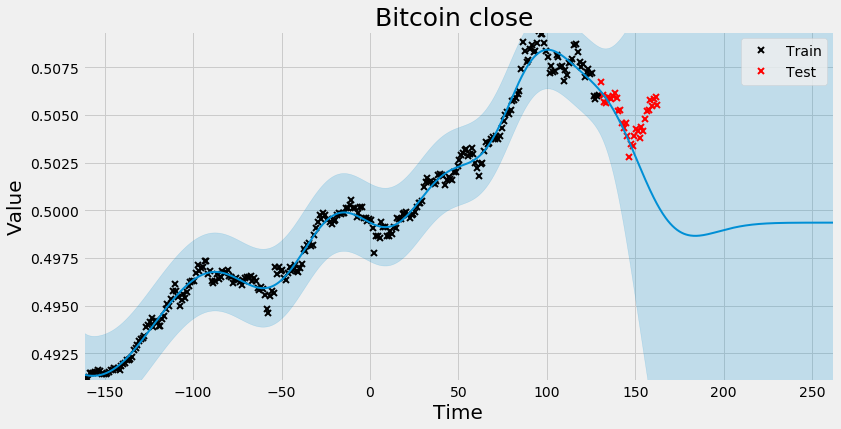

In [65]:
X_pred = np.linspace(date_gp.min(), date_gp.max()+100, 1000)[:, None]
Y_pred_mean, Y_pred_var = m.predict_y(X_pred)
Y_test = info_normalized[train_count:]
X_test = date_gp[train_count:]

xlimit = [min(date_gp), max(date_gp)+100]
plot(date_gp_train, info_normalized_train, X_test, Y_test, X_pred, Y_pred_mean, Y_pred_var, xlimit, coin+" "+attribute+" ")